## Load data

First, load up a DataFrame:

In [1]:
# To keep the page organized, do all imports here
import pandas as pd
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

You'll read the student performance file as an example for data visualization.

In [2]:
students_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/studentsperformance.csv")

Use `head()` to look into the first five rows

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Then get some information about the student data.

In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Before you go on, use the techniques from the previous lesson to explore this dataset so that you understand the basic data schema.

## Understanding distribution with histograms 

The histogram can help you quickly analyze a variable's distribution. In this lesson, you'll focus on the math, reading, and writing scores; you'll investigate how they are distributed in student performance data.

In [5]:
students_df[['math score', 'writing score', 'reading score']].describe()

,math score,writing score,reading score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


You can see that math has a mean of `66`. Let's make a basic histogram for "math score" using the `histplot` function:

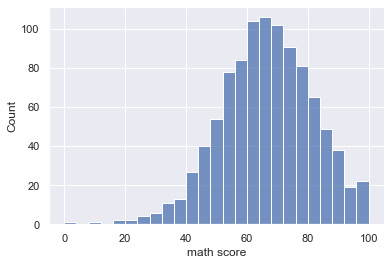

In [6]:
ax = sns.histplot(students_df['math score'])

From this simple example, you can see that seaborn is capable of automatically handling many aspects of the output visualization: the label for the x-axis (generated from the Series name), the number of bins, and so forth. However, if the values that seaborn chooses aren't suitable for your use case, you can customize the appearance of the visualization through the parameters of the `histplot()` function.

For example, the `histplot()` function usually selects a reasonable number of bins by default, but increasing or decreasing the number of bins may reveal useful additional detail about the distribution of values for the chosen column. The number of bins can be manually controlled through the `bins` parameter. Below, create two histograms for `reading score`, one with 20 bins and the other with the number of bins chosen by seaborn:

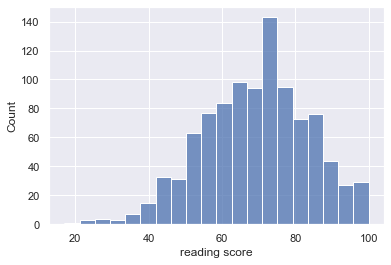

In [8]:
ax = sns.histplot(students_df['reading score'], bins=20)

You can also change the number of bins to 10, 30, or 50, and you will get a slightly different distribution depending on the number of bins that you decide to use. Here's what the same histogram looks like when you use 10 bins:

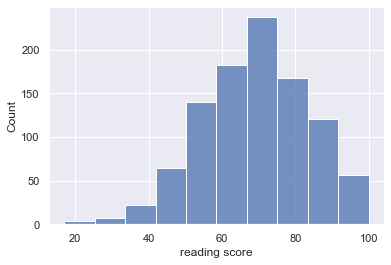

In [10]:
ax = sns.histplot(students_df['reading score'], bins=10)

And here's what it looks like using 50 bins:

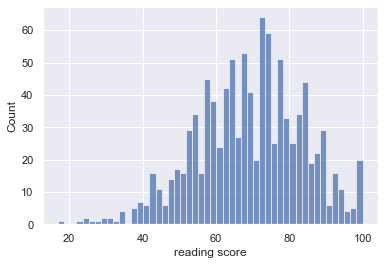

In [11]:
ax = sns.histplot(students_df['reading score'], bins=50)

Another useful customization available for histograms in seaborn is the ability to add a kernel density estimate (KDE). KDEs, which are essentially smoothed histograms, can be added by setting the `kde` parameter to `True`. Below, create a histogram of `writing score` with a KDE on top:

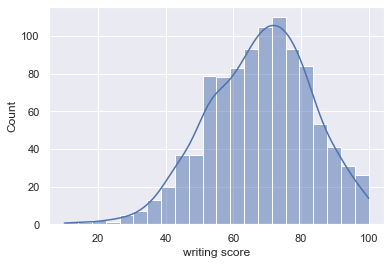

In [12]:
ax = sns.histplot(students_df['writing score'], kde=True)

Finally, note that the default y-axis aggregation is the raw count of observations per bin. Alternative aggregations that normalize the counts are frequently preferable; the `stat` parameter allows you to specify other aggregations. Below, create a final histogram on `writing score`, showing the percentage of observations in each bin on the y-axis:

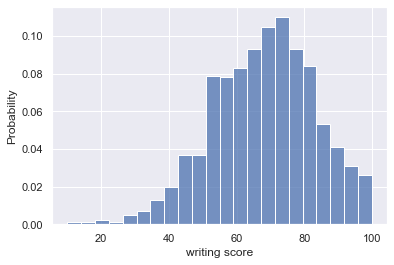

In [13]:
ax = sns.histplot(students_df['writing score'], stat='probability')

The shape of this histogram is identical to that of the previous histogram, but the counts have been divided by the total number of observations to produce percentages (or probabilities).

## Comparing the distribution of two variables

Next, visualize the relationship between two variables. Here, what you want is a scatter plot; for that, use  the `scatterplot()` function. Now, compare math and reading scores:

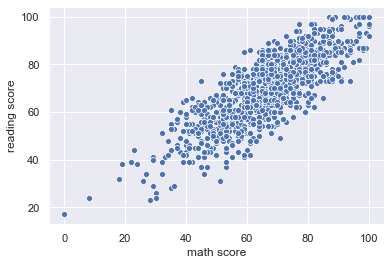

In [12]:
sns.scatterplot(x="math score", y="reading score", data=students_df);

In a scatter plot, one variable is plotted on the x-axis and the other on the y-axis. It may be immediately obvious that as the math score increases, the reading score also increases. One explanation here might be that students who are good at math are also better at reading, or vice versa. Or, you might think that what's really at stake is that schools that have high reading scores also tend to have high writing scores, because they have sufficient resources. 

Suppose that you wanted to see how this distribution works across a gender variable. You could group the data by gender and generate a scatter plot by telling seaborn which categorical column to use.

You can add *gender* in the `hue` parameter to specify that.

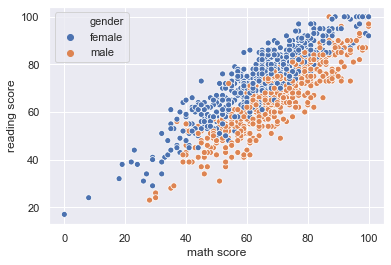

In [13]:
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

It looks like females are scoring higher in reading than the males. You will further explore this in another type of plot shortly.

Does the type of lunch have any effect on the score? You can vary the type of markers as well as the colors used, which can show grouping by two different variables.

You can add *lunch* in the `style` parameter to show the difference between `standard` and `free/reduced`.

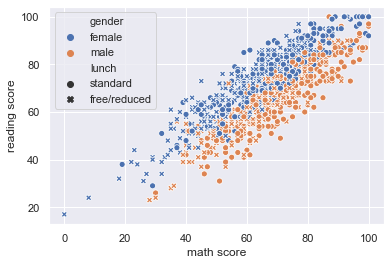

In [14]:
sns.scatterplot(x="math score", y="reading score", hue="gender", style="lunch",  data=students_df );

You can even vary the size of the markers to show another variable. The visualization below explores whether completion of the preparation course matters.

You can add *test preparation course* in the `size` parameter to show the difference by the size of the data marker.

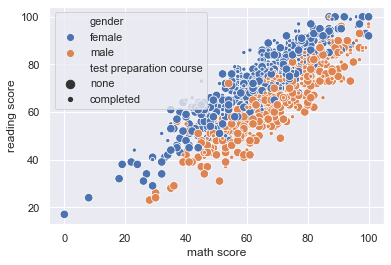

In [15]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=students_df);

It's possible to combine the histogram and the scatter plot to see both the individual distributions as well as the relative distributions on the same graph.

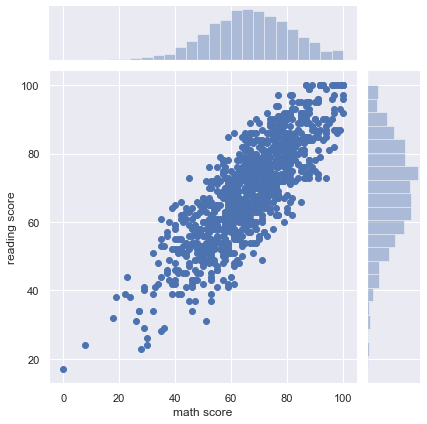

In [16]:
sns.jointplot(x="math score", y="reading score", data=students_df);

To plot multiple distributions in the dataset, use the `pairplot()` function. It will compare all variables against each other in a matrix of plots.

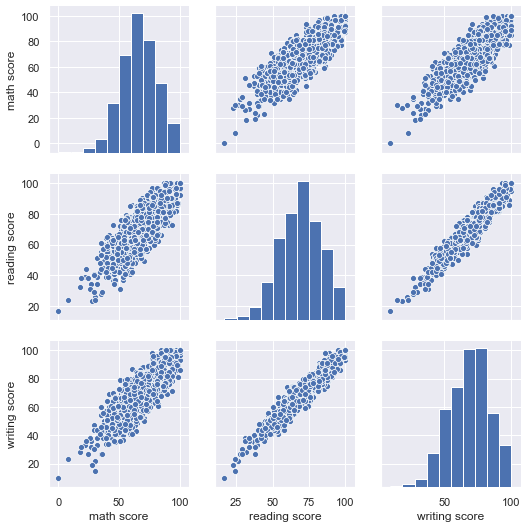

In [17]:
sns.pairplot(students_df);

You can see strong correlations between the three scores.

Next, examine distributions with respect to categories. In the scatter plots above, the plots became progressively harder to interpret as you added categorical variables. Instead, you could use a box plot to compare these variables by category.

## Box plots

Box plots visually illustrate the distribution of values in a category. In a box plot, the median and upper and lower quartiles are clearly shown, as well as the maximum and minimum. Two or more samples may be compared using the box plot.

![Labeled box plot showing outliers, maximum, upper quartile, median, lower quartile, minimum, and outliers again.](assets/python4_visualizations_01-v2.png)

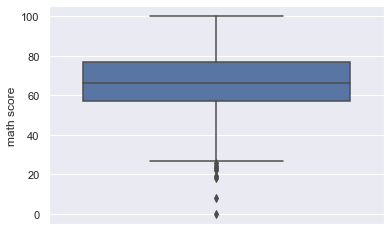

In [18]:
sns.boxplot(y="math score", data=students_df);

How are math scores distributed across genders?

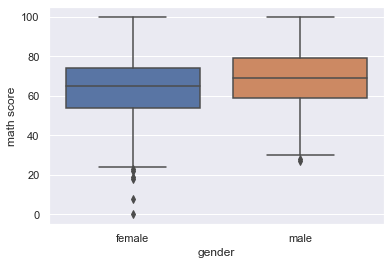

In [19]:
sns.boxplot(y="math score", x="gender", data=students_df);

How are math scores affected by parent education and gender? To properly display the labels on the x-axis, you will have to rotate the labels.

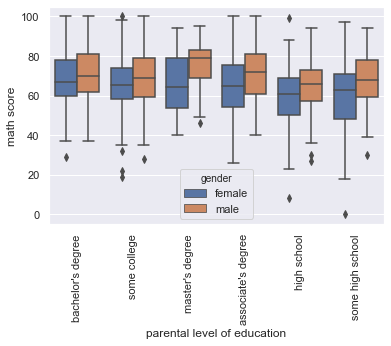

In [20]:
ax = sns.boxplot(y="math score", hue="gender", x = "parental level of education", data=students_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

With the box plot, it's easier to compare the medians of the various categories and the range of values. There doesn't seem to be any significant difference in parental level of education. Maybe the preparation course makes a difference? Take a look at that variable. If you want to see the gender, lunch, and test preparation course variables in one plot, then a categorical plot might be a good choice. For this, use the `catplot()` function.

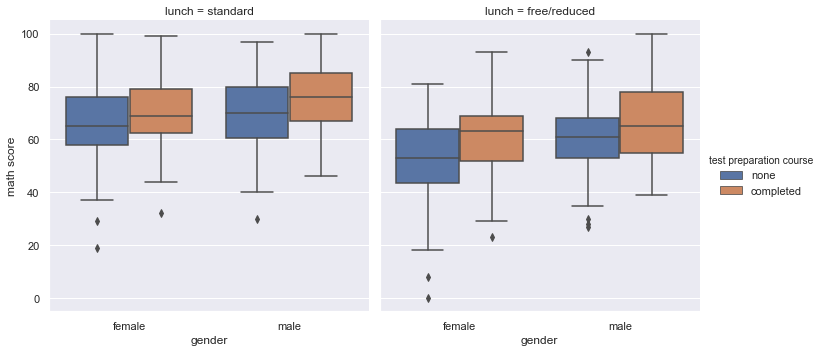

In [21]:
sns.catplot(y="math score", x="gender", hue = "test preparation course", col="lunch",
            kind="box", data=students_df);

Now you get some interesting results. It's clear that the students who completed the test preparation course scored higher than those who did not. There also seems to be a small advantage to the group with the standard lunch over the group with the reduced lunch.

# Custom plots in seaborn

Seaborn includes many options for customizing a chart. Look at the most common options, using your grouped scatter plot from earlier as an example.. 

## Seaborn styles

Seaborn comes with a handful of figure styles which can be loaded by calling `sns.set_style()`. Then all following plots will be charted based on the theme.

To see how this works, try using the `white` theme on the scatter plot. 

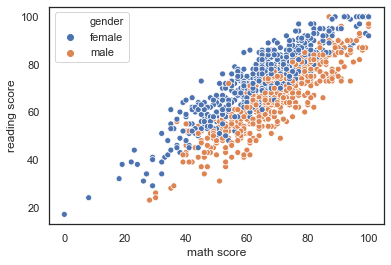

In [22]:
sns.set_style("white")
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

The plot now uses a simple white background.

To experiment with the other seaborn themes, check out the [seaborn documentation](https://seaborn.pydata.org/tutorial/aesthetics.html).

Seaborn also comes with several methods for controlling the *aesthetics* or visual elements of a plot. Again, to learn about the entire suite, check out [official seaborn docs](https://seaborn.pydata.org/tutorial.html). You'll focus on one of the most common, the `despine()` method. This will remove the upper and right borders from the plot.

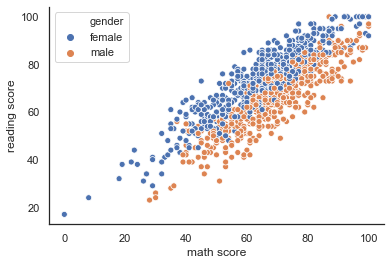

In [23]:
# Get rid of the box
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
sns.despine();

Remember that all seaborn plots will be charted using the current theme until specified otherwise. Use `sns.set()` to restore default seaborn settings. 

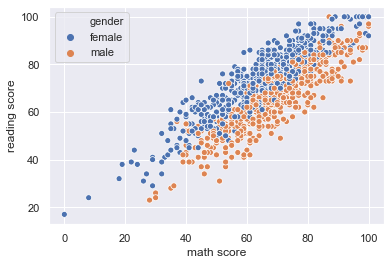

In [24]:
sns.set()
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

## Customizing seaborn plots with pyplot

At the beginning of this lesson, it was mentioned that seaborn is based on Matplotlib. This means that you can include Matplotlib functionalities directly with seaborn plots. Explore this using the pyplot series of functions from `matplotlib.pyplot`. The standard alias for this collection is `plt`.

Like seaborn, pyplot contains too many functions to cover here; for the complete list, check out [the documentation](https://matplotlib.org/users/pyplot_tutorial.html). 

Among the most common uses of pyplot with seaborn is to add custom axis labels and a plot title. This can be done with the methods `xlabel()`, `ylabel()`, and `title()`, respectively. Call `plt.show()` to print the results of the plot. These methods will be executed with your seaborn scatter plot and compiled onto one plot. 

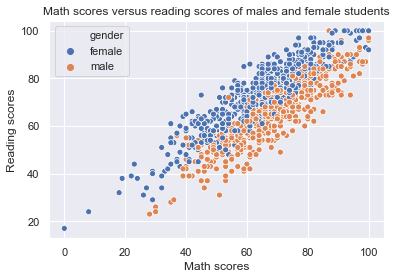

In [25]:
import matplotlib.pyplot as plt

# Custom labels
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

The new plot feels a little cramped with the title. You can resize the plot using the `figure()` method from pyplot. Call this method *before* making your seaborn plot. 

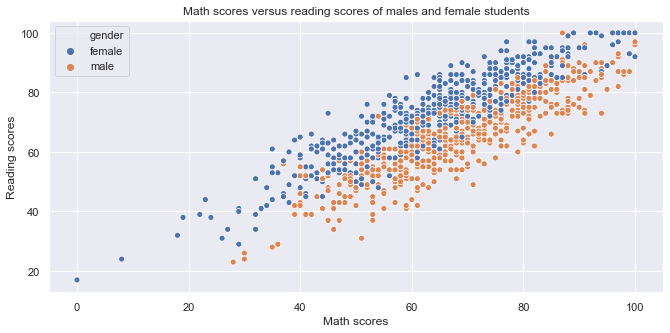

In [26]:
# Make a wider plot

plt.figure(figsize = (11,5))
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

This method can also be helpful for resizing plots where axis labels are hard to read.